# 1 {-}

**Attached you will find the files TimeSeries2.csv, TimeSeries3.csv, TimeSeries4.csv. Each of these files contains a $1000 \times 20$ matrix constructed in the same way as the time series dataset from hw 4. The difference is that TimeSeries2.csv contains only two base times series, while TimeSeries3.csv and
TimeSeries4.csv contain 3 and 4 base time series, respectively.**

# a {-}

**Before doing any computations, decide what might be the best dimension $K$ to use for a PCA in approximating each
of these three datasets. Explain your reasoning. (No wrong answer here. I just want you to think things through.)**

Since TimeSeries2.csv, TimeSeries3.csv, and TimeSeries4.csv each have 2, 3, and 4 base time series, respectively, I would expect 2, 3, and 4 dimensional PCA's respectively to capture most of the variance of each dataset. 

Note: As is shown below with a plot, 2, 3, and 4 dimensional PCA's are able to capture roughly $70\%$ of the variance in TimeSeries2.csv, TimeSeries3.csv, and TimeSeries4.csv, respectively. 

# b {-}

**For each of the three data files do the following.**

**i. Compute the eigenvalues of the covariance matrix. Then, plot the fraction of the dataset’s variance captured by a $K$-dimensional PCA for $K = 1, 2, . . . , 20.$ Discuss how the fraction of variance captured as $K$ varies reflects the number of base time series.**

**ii. Use a 2-d PCA to reduce the dimensionality of the data and then produce a plot of the 1000 data points. (In a 2-d PCA each $X^{(i)}$ corresponds to a $(c^{(i)}_1, c^{(i)}_2)$. Plot the
$c^{(i)}$). Do the data points separate into the appropriate
number of clusters?**

**iii. For the 2-d PCA, compute the correlation between $c^{(i)}_1$
and $c^{(i)}_2$ for $i = 1,2,...,1000$. Then compute the variance of $c^{(i)}_1$ and the varaince of $c^{(i)}_2$ and relate to the eigenvalues you computed in (a).**

**In answering (i)-(ii), do not use R or Python’s pca function(s). Instead compute the PCA yourself. You can call R’s eigen function and the Python equivalent.**

In [1]:
import pandas as pd

t2 = pd.read_csv("TimeSeries_K2.csv").to_numpy()
t3 = pd.read_csv("TimeSeries_K3.csv").to_numpy()
t4 = pd.read_csv("TimeSeries_K4.csv").to_numpy()

print(t2.shape, t3.shape, t4.shape)

(1000, 20) (1000, 20) (1000, 20)


**i. Compute the eigenvalues of the covariance matrix. Then, plot the fraction of the dataset’s variance captured by a $K$-dimensional PCA for $K = 1, 2, . . . , 20.$ Discuss how the fraction of variance captured as $K$ varies reflects the number of base time series.**

Let's first find the covariance matrix for each dataset:

$\text{cov[X]}=\frac{1}{N}(X-\mu)^T(X-\mu)$ where $\mu \in R^{20}$ and $\mu_j=\sum_{i=1}^{N}X_j^{(i)}$ for $j=1,2,\ldots, 20.$

In [2]:
N = t2.shape[0]
cov_t2 = (t2-t2.mean(axis=0)).T.dot(t2-t2.mean(axis=0))/N
cov_t3 = (t3-t3.mean(axis=0)).T.dot(t3-t3.mean(axis=0))/N
cov_t4 = (t4-t4.mean(axis=0)).T.dot(t4-t4.mean(axis=0))/N
         
print(cov_t2.shape, cov_t3.shape, cov_t4.shape)

(20, 20) (20, 20) (20, 20)


Since covariance matrices are symmetric we should expect (spectral theorem) each covariance matrix to have $20$ real eigenvalues. Let's compute the eigenvalues for each covariance matrix.

In [3]:
import numpy as np

eig_cov_t2 = np.linalg.eig(cov_t2)
eig_cov_t3 = np.linalg.eig(cov_t3)
eig_cov_t4 = np.linalg.eig(cov_t4)

print(eig_cov_t2[0].shape, eig_cov_t3[0].shape, eig_cov_t4[0].shape)

(20,) (20,) (20,)


In [4]:
# the eigenvalues of the covariance for t2
eig_cov_t2[0]

array([76.11563867,  2.98259553,  4.88448549,  3.10487708,  4.7602523 ,
        4.66437519,  4.51890529,  4.49556067,  4.42754019,  4.31307707,
        4.18074156,  3.2192369 ,  3.34761593,  3.33685739,  3.44595997,
        3.53706976,  4.005546  ,  3.73734145,  3.81528351,  3.84505464])

In [5]:
# the eigenvalues of the covariance for t3
eig_cov_t3[0]

array([66.56847748, 26.75040627,  3.005608  ,  3.02623493,  4.88724149,
        4.7834879 ,  4.59217904,  3.39141785,  4.49880483,  4.44844181,
        3.50172154,  3.5687521 ,  3.707662  ,  4.24960669,  4.17690598,
        3.79754054,  4.04251643,  3.9441089 ,  3.92367614,  3.91708829])

In [6]:
# the eigenvalues of the covariance for t4
eig_cov_t4[0]

array([54.45322783, 35.85477729, 16.52750377,  3.05497286,  4.97529629,
        3.22020995,  4.82077404,  4.73807535,  4.63358624,  4.45214356,
        4.29491308,  4.20564498,  3.41505061,  3.46554157,  3.60392598,
        4.01930054,  3.93268889,  3.90467778,  3.72036029,  3.75851329])

Let's create a function that computes the fraction of the dataset’s variance captured by a $k$-dimensional PCA for some given value of $k$.

In [7]:
def variance_captured(k, data):
    """ Computes the fraction of a dataset's variance captured by a k-dimensional PCA
    Args:
        k: a scalar
        data: a 2 dimensional matrix of shape
    
    Returns:
        A scalar
    """
    covariance = data.T.dot(data)
    ev = sorted(np.linalg.eig(covariance)[0], reverse=True)
    return sum(ev[:k])/sum(ev) 

In [8]:
vc_t2 = [variance_captured(k, t2) for k in range(1, 21)]
vc_t3 = [variance_captured(k, t3) for k in range(1, 21)]
vc_t4 = [variance_captured(k, t4) for k in range(1, 21)]

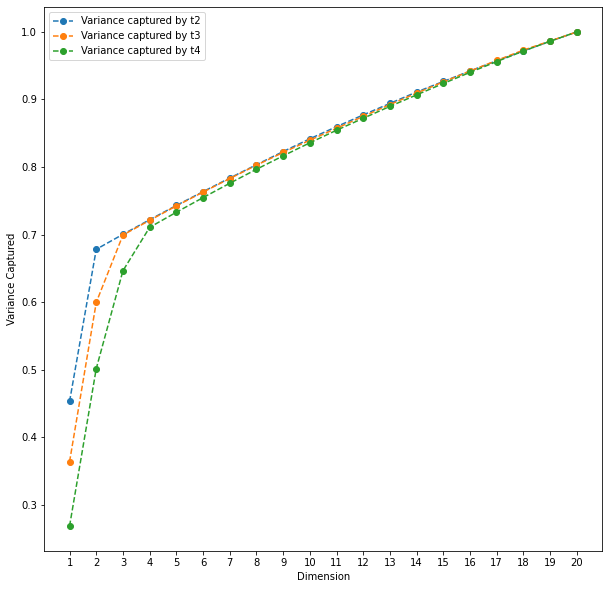

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(range(1, 21), vc_t2, "o--", label="Variance captured by t2")
plt.plot(range(1, 21), vc_t3, "o--", label="Variance captured by t3")
plt.plot(range(1, 21), vc_t4, "o--", label="Variance captured by t4")
plt.legend()
plt.xlabel("Dimension")
plt.ylabel("Variance Captured")
plt.xticks(range(1, 21))
plt.show()

TimeSeries2.csv has 2 base time series and from the plot above, you can notice how the marginal increase in variance captured is much smaller for $k>2$. That is, with only $2$ principal components you are able to capture roghly $70\%$ of the data's variance -- as you add more principal components you will only be able to increase variance captured by roughly $5\%$.

The same happends for TimeSeries3.csv and TimeSeries4.csv. TimeSeries3.csv has 3 base time series and 3 principal components are able to capture roughly $70\%$ of the data's variance -- marginal increase in variance captured gets smaller as $k, k>3,$ increases. TimeSeries4.csv has 4 base time series and 4 principal components are able to capture roughly $70\%$ of the data's variance -- marginal increase in variance captured gets smaller as $k, k>4,$ increases.

**ii. Use a 2-d PCA to reduce the dimensionality of the data and then produce a plot of the $1000$ data points. (In a 2-d PCA each $X^{(i)}$ corresponds to a $(c^{(i)}_1, c^{(i)}_2)$. Plot the $c^{(i)}$). Do the data points separate into the appropriate number of clusters?**



Let's project each dataset in $R^{20}$ to $R^2$.

To do so we need the dataset $X$, a matrix $Q$ with $2$ columns, the first column being an eigenvector corresponding to the largest eigenvalue of the covariance matrix $X^TX$ and the second column being an eigenvector corresponding to the second largest eigenvalue of the covariance matrix $X^TX.$

We want $c=XQ$ which has shape $(1000, 2)$.

In [10]:
Q_t2 = eig_cov_t2[1][:,np.argsort(eig_cov_t2[0])[::-1][:2]]
Q_t3 = eig_cov_t3[1][:,np.argsort(eig_cov_t3[0])[::-1][:2]]
Q_t4 = eig_cov_t4[1][:,np.argsort(eig_cov_t4[0])[::-1][:2]]

print(Q_t2.shape, Q_t3.shape, Q_t4.shape)

(20, 2) (20, 2) (20, 2)


In [11]:
c_t2 = (t2-t2.mean(axis=0)).dot(Q_t2)
c_t3 = (t3-t3.mean(axis=0)).dot(Q_t3)
c_t4 = (t4-t4.mean(axis=0)).dot(Q_t4)

print(c_t2.shape, c_t3.shape, c_t4.shape)

(1000, 2) (1000, 2) (1000, 2)


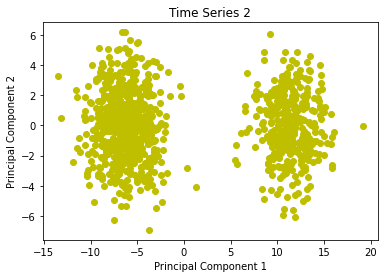

In [12]:
import matplotlib.pyplot as plt
plt.plot(c_t2[:,0],c_t2[:,1], 'yo')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Time Series 2")
plt.show()

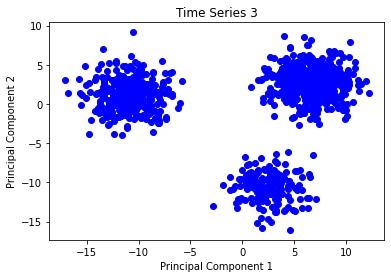

In [13]:
plt.plot(c_t3[:,0], c_t3[:,1], 'bo')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Time Series 3")
plt.show()

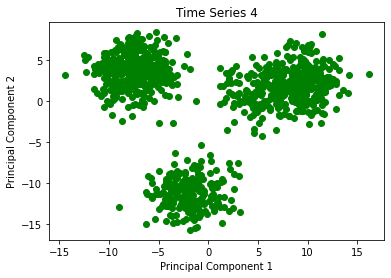

In [14]:
plt.plot(c_t4[:,0], c_t4[:,1], 'go')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Time Series 4")
plt.show()

The data do separate into the appropriate number of clusters. The first plot separates the data into two groups, corresponding to the 2 base time series (2 principal components are able to capture the underlying base time series, filtering out much of the noise). Similarly, the second plot separates the data into three groups, corresponding to the 3 base time series (2 principal components are able to capture the underlying base time series, filtering out much of the noise). And lastly, the third plot separates the data into four groups (it looks like there are two groups in the top right), corresponding to the 4 base time series (2 principal components are able to capture the underlying base time series, filtering out much of the noise).

**iii. For the 2-d PCA, compute the correlation between $c^{(i)}_1$
and $c^{(i)}_2$ for $i = 1,2,...,1000$. Then compute the variance of $c^{(i)}_1$ and the variance of $c^{(i)}_2$ and relate to the eigenvalues you computed in (a).**

Some notes before computing:

- $\bar{c_j} = \frac{1}{N}\sum_{i=1}^{N}c_j^{(i)}=\frac{1}{N}\sum_{i=1}^{N}(x^{(i)}-\mu)\cdot q^{(j)}=0$ for $j=1,2$


- $\text{var}[c_j]=\frac{1}{N}\sum_{i=1}^{N}(c_j^{(i)})^2=\frac{1}{N}\sum_{i=1}^{N}((x^{(i)}-\mu)\cdot q^{(j)})((x^{(i)}-\mu)\cdot q^{(j)})=(q^{(j)})^T\frac{1}{N}\sum_{i=1}^{N}(x^{(i)}-\mu)\cdot(x^{(i)}-\mu)^Tq^{(j)}= (q^{(j)})^T\hat{\Sigma}q^{(j)}=(q^{(j)})^T\lambda_jq^{(j)}=\lambda_j~\text{for}~j=1,2$


- $\text{cov}[c_1, c_2]=\frac{1}{N}\sum_{i=1}^{N}c_1^{(i)}c_2^{(i)}=\frac{1}{N}\sum_{i=1}^{N}((x^{(i)}-\mu)\cdot q^{(1)})((x^{(i)}-\mu)\cdot q^{(2)})=(q^{(1)})^T\frac{1}{N}\sum_{i=1}^{N}(x^{(i)}-\mu)\cdot(x^{(i)}-\mu)^Tq^{(2)}=(q^{(1)})^T\hat{\Sigma}q^{(2)}=(q^{(1)})^T\lambda_2q^{(2)}=0 \implies \text{corr}[c_1, c_2]=\frac{\text{cov}[c_1, c_2]}{\sqrt{\text{var}[c_1]\text{var}[c_2]}}=0$


In [15]:
def cov(x1, x2):
    """ Function that computes the sample covariance
    Args: 
        x1: matrix of length (N,)
        x2: matrix of length (N,)
    
    Returns:
        Scalar
    """
    N = len(x1)
    return sum(np.multiply(x1-np.mean(x1), x2-np.mean(x2)))/N

def corr(x1, x2): 
    """ Function that computes the sample correlation
    Args: 
        x1: matrix of length (N,)
        x2: matrix of length (N,)
    
    Returns:
        Scalar
    """
    covariance = cov(x1, x2)
    return(covariance/(np.sqrt(cov(x1, x1)*cov(x2, x2))))

In [16]:
# Time Series 2
corr_t2 = corr(c_t2[:,0], c_t2[:,1])
# Time Series 3
corr_t3 = corr(c_t3[:,0], c_t3[:,1])
# Time Series 4
corr_t4 = corr(c_t4[:,0], c_t4[:,1])

print(corr_t2, corr_t3, corr_t4)

-7.562421543395222e-16 -4.678440405116423e-16 -3.212923305089319e-16


As we can see the correlation is very close to $0$, agreeing with what was derived above.

In [34]:
# Time Series 2
covc1_t2 = cov(c_t2[:,0], c_t2[:,0])
covc2_t2 = cov(c_t2[:,1], c_t2[:,1])
# Time Series 3
covc1_t3 = cov(c_t3[:,0], c_t3[:,0])
covc2_t3 = cov(c_t3[:,1], c_t3[:,1])
# Time Series 4
covc1_t4 = cov(c_t4[:,0], c_t4[:,0])
covc2_t4 = cov(c_t4[:,1], c_t4[:,1])

print("TIME SERIES 2")
print(f"Variance c1: {covc1_t2} \t Variance c2: {covc2_t2}")
print(f"Eigenvalue 1: {sorted(eig_cov_t2[0], reverse=True)[0]} \t Eigenvalue 2: {sorted(eig_cov_t2[0], reverse=True)[1]}\t")
print("\n")
print("TIME SERIES 3")
print(f"Variance c1: {covc1_t3} \t Variance c2: {covc2_t3}")
print(f"Eigenvalue 1: {sorted(eig_cov_t3[0], reverse=True)[0]}\t Eigenvalue 2: {sorted(eig_cov_t3[0], reverse=True)[1]}\t")
print("\n")
print("TIME SERIES 4")
print(f"Variance c1: {covc1_t4}\t Variance c2: {covc2_t4}")
print(f"Eigenvalue 1: {sorted(eig_cov_t4[0], reverse=True)[0]}\t Eigenvalue 2: {sorted(eig_cov_t4[0], reverse=True)[1]}\t")

TIME SERIES 2
Variance c1: 76.11563866885112 	 Variance c2: 4.884485487200318
Eigenvalue 1: 76.115638668851 	 Eigenvalue 2: 4.884485487200315	


TIME SERIES 3
Variance c1: 66.56847748313072 	 Variance c2: 26.750406272241978
Eigenvalue 1: 66.56847748313068	 Eigenvalue 2: 26.750406272241996	


TIME SERIES 4
Variance c1: 54.453227833534825	 Variance c2: 35.85477729301576
Eigenvalue 1: 54.45322783353476	 Eigenvalue 2: 35.854777293015715	


As can be seen from above, the variances of the $c_i$'s for $i=1,2$ are extremely close to the corresponding eigenvalue $\lambda_i$ for $i=1,2$ agreeing with what was derived previously.

# 2 {-}

**Suppose we roll 100 dice and the sum of the die rolls is 450. Use an MCMC approach to determine** 

**(i) the expected number of 6’s rolled**

**(ii) the expected number of 1’s rolled and**

**(iii) the probability that we roll less than thirty 1’s.** 

**Do all of these using a single run of a Markov chain. Be sure to include a burn-in time and run your chain for a sufficient length of time.**

Let $X$ be our random variable and let $\Omega$ be our sample space. In other words $\Omega= \{X \in R^{100}: X_i \in {1,2,3,4,5,6}~\text{and}~\sum_{i=1}^{100}X_i=450\}$. We want to be able to generate samples, $\omega$'s, from $\Omega$ in order to answer (i), (ii), and (iii). The distribution of $X$ (our target distribution) is


$$ p=P(X=\omega)=\begin{cases} 
      \frac{1}{|\Omega|} & \text{if}~ \omega\in \Omega \\
      0 & \text{otherwise}
   \end{cases}
$$



Let's choose a symmetric proposal distribution $q$: We will propose $\omega'$ by randomly choosing two entries of the $100$ entries of $w$. So $q(\omega'|\omega)=q(\omega|\omega')=\frac{1}{100^2}.$

And so to generate a sample from our target distribution $p$ we do the following:

1. Generate $\omega'$ from $q(\omega'|\omega_t)$
2. Generate $\hat{u}$ from  Uniform$(0,1)$
3. If $\hat{u} < \frac{p(\omega')q(\omega_t|\omega')}{p(\omega_t)q(\omega'|\omega_t)}=\frac{p(\omega')}{p(\omega_t)}=\frac{p(\omega')}{\frac{1}{|\Omega|}}
\begin{cases} 
      1 & \text{if}~ \omega' \in \Omega \\
      0 & \text{otherwise}
   \end{cases}$

accept $\omega'$ and set $\omega_{t+1}=\omega'$; Otherwise set $\omega_{t+1}=\omega_t$

Note that the above reduces to setting $\omega_{t+1}=\omega'$ if the sum of $\omega'$s entries equals $450$ and setting $\omega_{t+1}=\omega_t$ otherwise.

In [18]:
def MCMCDiceRoll(w, N):
    """Returns samples generated via Markov Chain Monte Carlo (MCMC)
    
    Args:
        w: A matrix of shape (100, )
        N: scalar representing the run time length of the markov chain
        
    Returns:
        samples: A list (length N) of the MCMC samples (each sample 100 dimensional)
        acceptance_rate: How many 
    
    """
    samples = []
    sums = []
    for _ in range(N):
        rows = np.random.choice(np.arange(100), 2)

        wprime = w.copy()
        wprime[rows[0]] = max(1, wprime[rows[0]]-1)
        wprime[rows[1]] = min(6, wprime[rows[1]]+1)
        
        sums.append(wprime.sum())
        if wprime.sum() == 450:
            w = wprime
        
        samples.append(w)
    
    acceptance_rate = len([s for s in sums if s==450])/len(sums)
    return samples, acceptance_rate

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# initializing with w in Omega
X0 = np.concatenate((np.repeat(6, 70), np.repeat(1, 30)))

In [20]:
samples, acceptance_rate = MCMCDiceRoll(X0, 10**6)

(i) the expected number of 6’s rolled

From our samples list let's find the number of 6's in each sample.

In [21]:
sixes = [(w==6).sum() for w in samples]

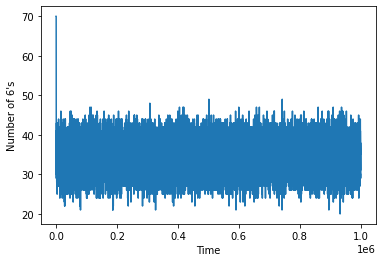

The acceptance rate is: 0.641118


In [22]:
plt.plot(sixes)
plt.ylabel("Number of 6's")
plt.xlabel("Time")
plt.show()
print(f"The acceptance rate is: {acceptance_rate}")

From the above plot we can see that running the chain for 1 million iterations is good enough as it looks like ocnvergence is happening. Further, we can test the convergence (whether our chain has reached its stationary distribution) by running the chain again with another starting value. 

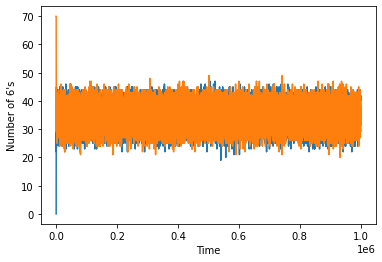

In [23]:
X0_2 = np.concatenate((np.repeat(5, 50), np.repeat(4, 50)))
samples2, _ = MCMCDiceRoll(X0_2, 10**6)
sixes2 = [(w==6).sum() for w in samples2]
plt.plot(sixes2)
plt.plot(sixes)
plt.ylabel("Number of 6's")
plt.xlabel("Time")
plt.show()

From the above it looks like our chain has reached the stationary distribution. Let's use as burn in the first $10,000$ samples. 

In [24]:
sixes = sixes[10000:]

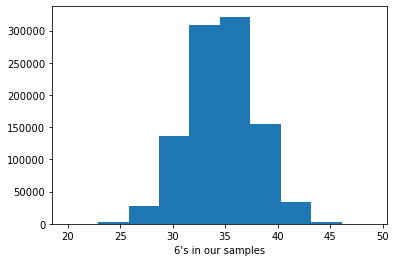

In [25]:
plt.hist(sixes)
plt.xlabel("6's in our samples")
plt.show()

And so the expected number of 6's:

In [26]:
np.mean(sixes)

34.657058585858586

(ii) the expected number of 1’s rolled 


Same analysis as above. From our samples list let's find the number of 1's in each sample.

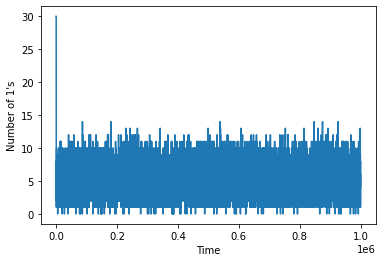

The acceptance rate is: 0.641118


In [27]:
ones = [(w==1).sum() for w in samples]
plt.plot(ones)
plt.ylabel("Number of 1's")
plt.xlabel("Time")
plt.show()
print(f"The acceptance rate is: {acceptance_rate}")

From the above plot we can see that running the chain for 1 million iterations is good enough as it looks like convergence is happening. Further, we can test the convergence (whether our chain has reached its stationary distribution) by running the chain again with another starting value. 

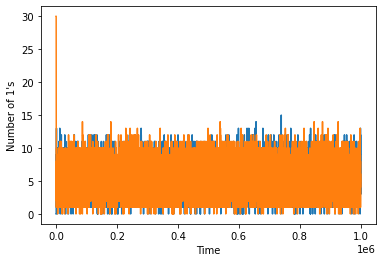

In [28]:
ones2 = [(w==1).sum() for w in samples2]
plt.plot(ones2)
plt.plot(ones)
plt.ylabel("Number of 1's")
plt.xlabel("Time")
plt.show()

From the above it looks like our chain has reached the stationary distribution. Let's use as burn in the first $10,000$ samples. 

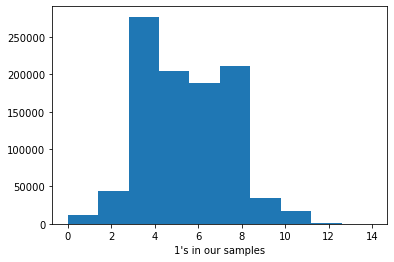

In [29]:
ones = ones[10000:]
plt.hist(ones)
plt.xlabel("1's in our samples")
plt.show()

And so the expected number of 1's:

In [30]:
np.mean(ones)

5.3631373737373735

(iii) the probability that we roll less than thirty 1’s

To approximate the probability that we roll less than 30 1's using Monte Carlo we need to express the probability as an expected value to be able to invoke the Law of Large Numbers (in this case, Markov Chain Law of Large Numbers).

Let $X$ be the number of 1's rolled. Let $H$ be an indicator random variable that equals 1 if we roll less than 30 1's and 0 if we roll more than 30 1's.

$$ H=\begin{cases} 
      1 & \text{if}~ X < 30 \\
      0 & \text{if}~ X \ge 30
   \end{cases}
$$

So $E[H]=1\cdot P\{X < 30 \}+0 \cdot P\{X \ge 30 \}=P\{X < 30 \}$.
And so now we can approximate $E[H]$ with $\frac{1}{N}\sum^{N}_{i=1}\mathbb{1}_{X<30}$ for an appropriate $N$ runs of the Markov Chain.


We determined from our "expected number of 1's analysis" that a burn in of $100,000$ was reasonable. 
Using a burn in of $100,000$:

In [31]:
p = [int((w==1).sum()<30) for w in samples[10000:]]
np.mean(p)

1.0

The above probability makes sense given our distribution of 1's plotted above.